In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_userquestionrecord.parquet'

# 데이터 불러오기
userquestionrecord_df = pd.read_parquet(gcs_path, engine='pyarrow')
userquestionrecord_df

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1217553,161666166,C,2024-05-07 11:29:07,945560,2614,1001607,190864020,1,N,2024-05-07 11:29:07,0,0
1217554,161666461,C,2024-05-08 01:34:56,850774,1679,855525,200139931,0,N,2024-05-08 01:34:56,0,0
1217555,161666462,C,2024-05-08 01:35:02,855509,2605,855525,200139932,0,N,2024-05-08 01:35:02,0,0
1217556,161666463,C,2024-05-08 01:36:00,855526,3801,855525,200139933,0,N,2024-05-08 01:36:00,0,0


In [3]:
userquestionrecord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int64         
 11  opened_times       1217558 non-null  int64         
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 111.5+ MB


In [4]:
userquestionrecord_df.columns.tolist()

['id',
 'status',
 'created_at',
 'chosen_user_id',
 'question_id',
 'user_id',
 'question_piece_id',
 'has_read',
 'answer_status',
 'answer_updated_at',
 'report_count',
 'opened_times']

In [5]:
userquestionrecord_df.dtypes

id                            int64
status                       object
created_at           datetime64[ns]
chosen_user_id                int64
question_id                   int64
user_id                       int64
question_piece_id             int64
has_read                      int64
answer_status                object
answer_updated_at    datetime64[ns]
report_count                  int64
opened_times                  int64
dtype: object

In [6]:
userquestionrecord_df.isnull().sum()

id                   0
status               0
created_at           0
chosen_user_id       0
question_id          0
user_id              0
question_piece_id    0
has_read             0
answer_status        0
answer_updated_at    0
report_count         0
opened_times         0
dtype: int64

In [7]:
userquestionrecord_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,1217558.0,NaN,NaN,NaN,59572979.018822,771777.0,15539652.75,53026805.0,94809596.25,161666464.0,46081927.886242
status,1217558,3,C,1156322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,1217558,NaN,NaN,NaN,2023-05-17 12:51:25.947102208,2023-04-28 12:27:49,2023-05-10 01:42:11,2023-05-15 15:43:01.500000,2023-05-22 11:01:03.750000128,2024-05-08 01:36:18,NaN
chosen_user_id,1217558.0,NaN,NaN,NaN,1092603.584565,833112.0,883692.0,1091749.0,1235698.0,1579422.0,202758.478202
question_id,1217558.0,NaN,NaN,NaN,684.389544,99.0,275.0,469.0,942.0,5133.0,625.039927
user_id,1217558.0,NaN,NaN,NaN,1105789.856924,838023.0,884619.0,1117537.0,1259186.0,1583358.0,206270.380697
question_piece_id,1217558.0,NaN,NaN,NaN,74132114.86932,998458.0,18541420.5,66168425.5,117673456.75,208351468.0,57572369.476189
has_read,1217558.0,NaN,NaN,NaN,0.555153,0.0,0.0,1.0,1.0,1.0,0.496949
answer_status,1217558,3,N,1097932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
answer_updated_at,1217558,NaN,NaN,NaN,2023-05-17 13:44:38.920359680,2023-04-28 12:27:49,2023-05-10 02:38:44.750000128,2023-05-15 16:29:08.500000,2023-05-22 11:41:54.750000128,2024-05-08 01:36:18,NaN



'status' 고유값 수: 3
status
C    1156322
I      60578
B        658
Name: count, dtype: int64


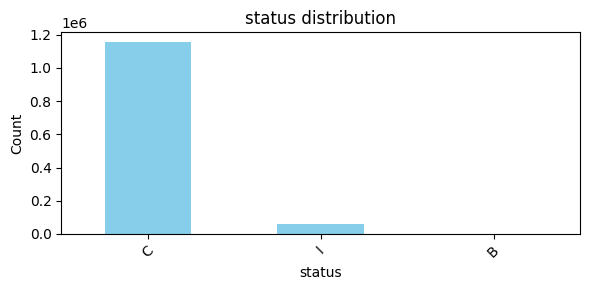


'answer_status' 고유값 수: 3
answer_status
N    1097932
A     111761
P       7865
Name: count, dtype: int64


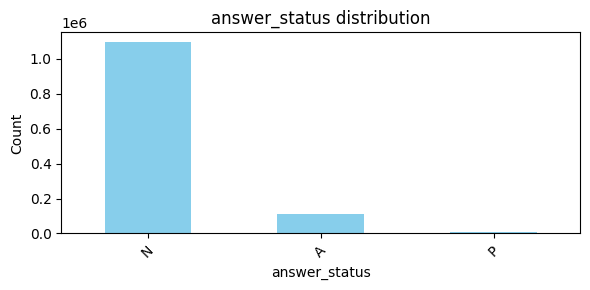

In [8]:
plt.rcParams['font.family'] = 'NanumGothic'


# 한글 폰트 없을 경우 영문 기본 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# object 또는 category 타입 컬럼 추출
categorical_cols = userquestionrecord_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n'{col}' 고유값 수:", userquestionrecord_df[col].nunique())
    print(userquestionrecord_df[col].value_counts(dropna=False).head(5))  # 결측 포함 출력

    # 시각화
    plt.figure(figsize=(6, 3))
    userquestionrecord_df[col].value_counts(dropna=False).head(10).plot(
        kind='bar', color='skyblue'
    )
    plt.title(f"{col} distribution")  
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C: Closed (닫힘) // I: Initial (초성 열림) // B: Blocked (차단)       
                  
N: Not Answered (미답변) // P: Private (비공개) // A: Available (공개)

#### 기간 필터링 (5월~7월) 일별 투표수

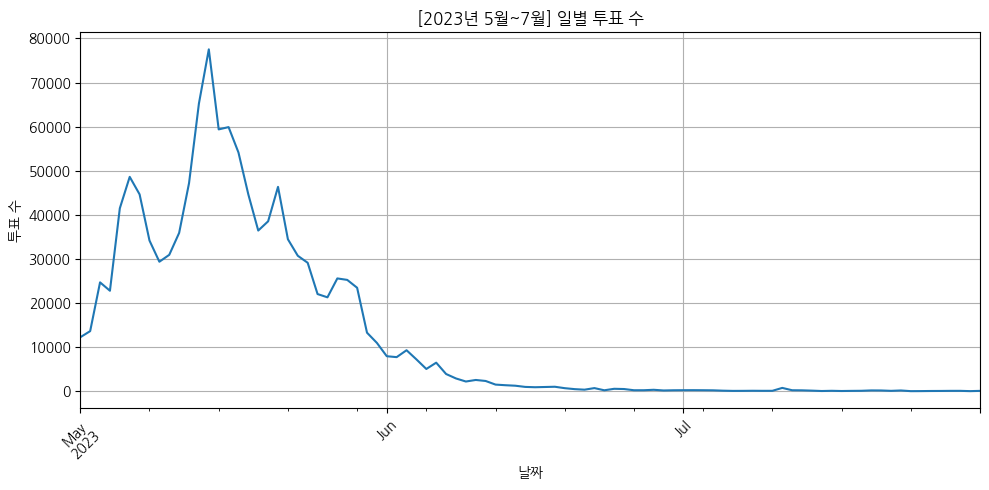

date
2023-05-01    12274
2023-05-02    13663
2023-05-03    24718
2023-05-04    22814
2023-05-05    41509
              ...  
2023-07-27      101
2023-07-28      121
2023-07-29      125
2023-07-30       61
2023-07-31      119
Length: 92, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 정확한 경로의 폰트 불러오기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()  # -> 'NanumGothic' 확인

# 폰트 설정 적용
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False


# 1. date 컬럼이 datetime 형식인지 확인
userquestionrecord_df['date'] = pd.to_datetime(userquestionrecord_df['created_at'].dt.date)

# 2. 날짜 필터링 (2023년 5월 1일 ~ 7월 31일)
start_date = pd.to_datetime('2023-05-01')
end_date = pd.to_datetime('2023-07-31')

filtered_df = userquestionrecord_df[(userquestionrecord_df['date'] >= start_date) & (userquestionrecord_df['date'] <= end_date)]

# 3. 일별 투표 수 계산
daily_vote_count = filtered_df.groupby('date').size()

# 4. 시각화
plt.figure(figsize=(10, 5))
daily_vote_count.plot(kind='line', title='[2023년 5월~7월] 일별 투표 수')
plt.xlabel('날짜')
plt.ylabel('투표 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


daily_vote_count

#### 유저당 평균 투표 수

평균: 251.09465869251392 중앙값: 190.0


<Axes: title={'center': '유저당 투표 수 분포'}, ylabel='Frequency'>

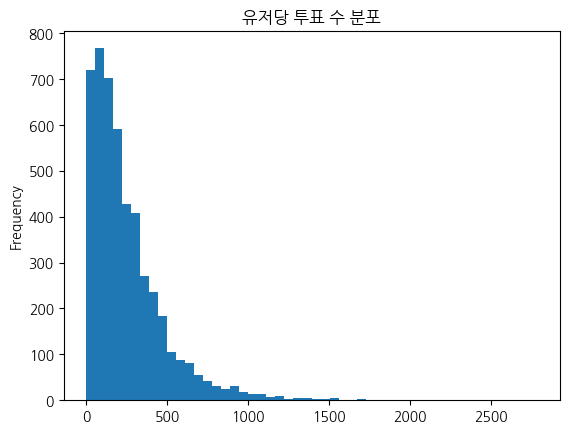

In [10]:
votes_per_user = userquestionrecord_df['user_id'].value_counts()
print("평균:", votes_per_user.mean(), "중앙값:", votes_per_user.median())
votes_per_user.plot(kind='hist', bins=50, title='유저당 투표 수 분포')

#### 질문별 투표 수

question_id
170    1996
290    1986
169    1984
211    1974
310    1956
186    1951
244    1946
102    1946
309    1939
152    1933
Name: count, dtype: int64

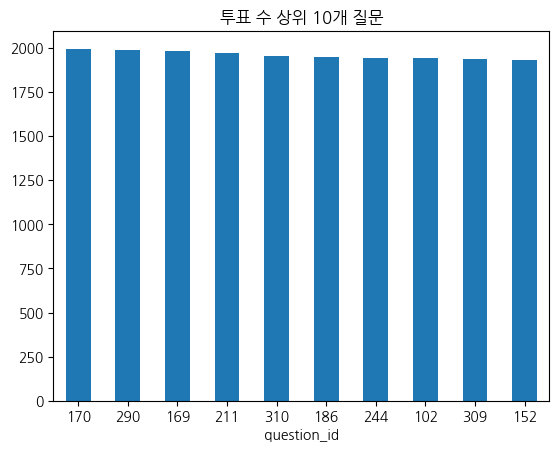

In [11]:
votes_per_question = userquestionrecord_df['question_id'].value_counts()
votes_per_question.head(10).plot(kind='bar', title='투표 수 상위 10개 질문')

plt.xticks(rotation=0)

votes_per_question.head(10)

- 170: 처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?
- 290: 모든 사람과 잘 지낼 것 같은 사람은?
- 169: 축제에서 공연을 제일 잘 할거 같은 사람은?
- 211: 앞으로의 인생을 가장 재미있게 살것 같은 사람은?
- 310: 반려동물과 가장 잘 지낼거 같은 사람은?	
- 186: vote
- 244: 대학교에서 학생회장할 것 같은 사람은?
- 102: 여기서 제일 특이한 친구는?	
- 309:  흰티에 청바지가 잘 어울릴것 같은 사람은?
- 152: 숨겨진 댄싱 머신이라고 생각하는 사람은?

In [4]:
question_df = pd.read_parquet("gs://final_project_enuyu/data/final_project/votes/polls_question.parquet")

In [5]:
# 질문별 투표 수
question_vote_counts = userquestionrecord_df['question_id'].value_counts().reset_index()
question_vote_counts.columns = ['question_id', 'vote_count']

# 질문 텍스트 붙이기 (question_df가 이미 로드되어 있다고 가정)
question_vote_counts = question_vote_counts.merge(
    question_df.rename(columns={'id': 'question_id'}),
    on='question_id', how='left'
)

# 상위 10개 출력
top_voted_questions = question_vote_counts.head(10)
display(top_voted_questions)

,question_id,vote_count,question_text,created_at
0,170,1996,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,2023-03-31 15:23:30
1,290,1986,모든 사람과 잘 지낼 것 같은 사람은?,2023-04-01 11:09:35
2,169,1984,축제에서 공연을 제일 잘 할거 같은 사람은?,2023-03-31 15:23:29
3,211,1974,앞으로의 인생을 가장 재미있게 살것 같은 사람은?,2023-04-01 11:09:20
4,310,1956,반려동물과 가장 잘 지낼거 같은 사람은?,2023-04-01 11:09:39
5,186,1951,vote,2023-04-01 11:09:15
6,244,1946,대학교에서 학생회장할 것 같은 사람은?,2023-04-01 11:09:26
7,102,1946,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
8,309,1939,흰티에 청바지가 잘 어울릴것 같은 사람은?,2023-04-01 11:09:38
9,152,1933,숨겨진 댄싱 머신이라고 생각하는 사람은?,2023-03-31 15:23:19


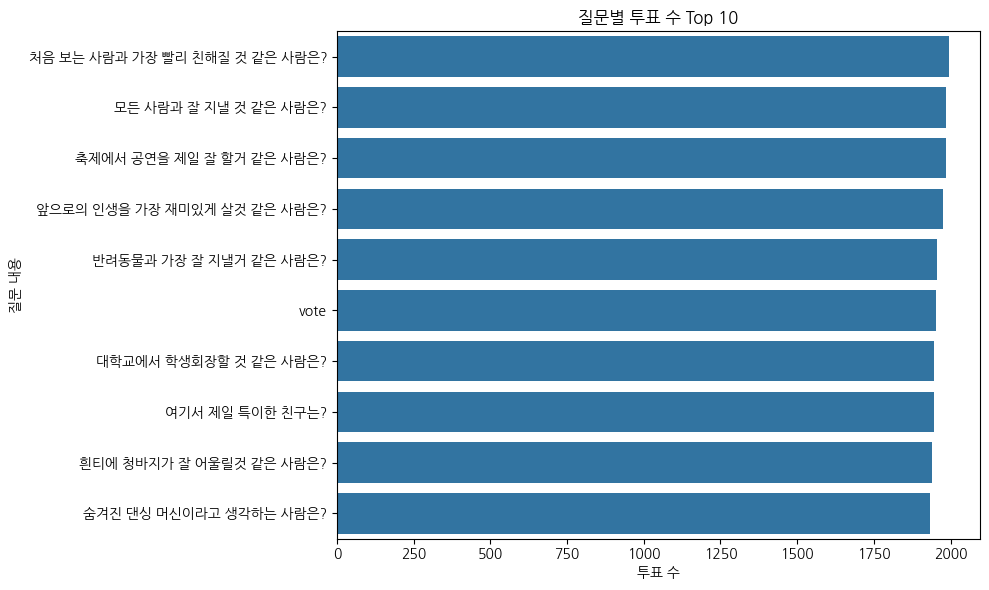

In [6]:
# 질문별 투표 수 집계
question_vote_counts = userquestionrecord_df['question_id'].value_counts().reset_index()
question_vote_counts.columns = ['question_id', 'vote_count']

# 질문 텍스트 병합
question_vote_counts = question_vote_counts.merge(
    question_df.rename(columns={'id': 'question_id'}),
    on='question_id', how='left'
)

# 상위 10개 출력
top_voted_questions = question_vote_counts.head(10)

# 시각화


plt.figure(figsize=(10, 6))
sns.barplot(data=top_voted_questions, y='question_text', x='vote_count')
plt.title('질문별 투표 수 Top 10')
plt.xlabel('투표 수')
plt.ylabel('질문 내용')
plt.tight_layout()
plt.show()


#### 투표율이 높고 투표 건수도 많은 질문

In [8]:
questionpiece_df = pd.read_parquet("gs://final_project_enuyu/data/final_project/votes/polls_questionpiece.parquet")

In [13]:
# total_count가 0인 경우 대비
question_vote_rate = question_vote_rate[question_vote_rate['total_count'] > 0].copy()

# 복합 점수 계산
question_vote_rate['composite_score'] = question_vote_rate['vote_rate'] * np.log1p(question_vote_rate['total_count'])

# 상위 10개 추출
top_combined = question_vote_rate.sort_values(by='composite_score', ascending=False).head(10)
display(top_combined[['question_id', 'vote_rate', 'total_count', 'vote_count', 'composite_score', 'question_text']])

,question_id,vote_rate,total_count,vote_count,composite_score,question_text
71,170,0.984236,2030,1998,7.496224,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?
53,152,0.988753,1956,1934,7.493922,숨겨진 댄싱 머신이라고 생각하는 사람은?
211,310,0.986398,1985,1958,7.490586,반려동물과 가장 잘 지낼거 같은 사람은?
210,309,0.987774,1963,1939,7.490031,흰티에 청바지가 잘 어울릴것 같은 사람은?
70,169,0.984135,2017,1985,7.489131,축제에서 공연을 제일 잘 할거 같은 사람은?
191,290,0.983177,2021,1987,7.483786,모든 사람과 잘 지낼 것 같은 사람은?
3,102,0.985316,1975,1946,7.477399,여기서 제일 특이한 친구는?
145,244,0.985316,1975,1946,7.477399,대학교에서 학생회장할 것 같은 사람은?
112,211,0.983076,2009,1975,7.477169,앞으로의 인생을 가장 재미있게 살것 같은 사람은?
72,171,0.987026,1927,1902,7.466104,틱톡 팔로워가 가장 많을 것 같은 사람


많이 노출되고도 참여율이 매우 높은 고품질 질문

#### 시간대별 투표

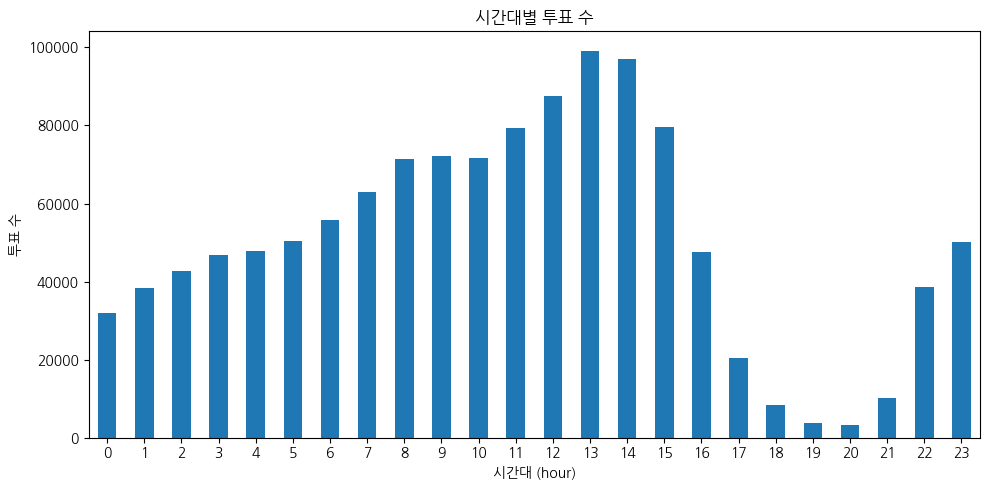

In [12]:
userquestionrecord_df['hour'] = userquestionrecord_df['created_at'].dt.hour

# 시각화
plt.figure(figsize=(10, 5))
userquestionrecord_df['hour'].value_counts().sort_index().plot(kind='bar', title='시간대별 투표 수')
plt.xlabel('시간대 (hour)')
plt.ylabel('투표 수')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()


#### status == C(닫힘) vs status == I(초성 열림) 그룹의 투표 수 비교

status
C    1156322
I      60578
Name: count, dtype: int64


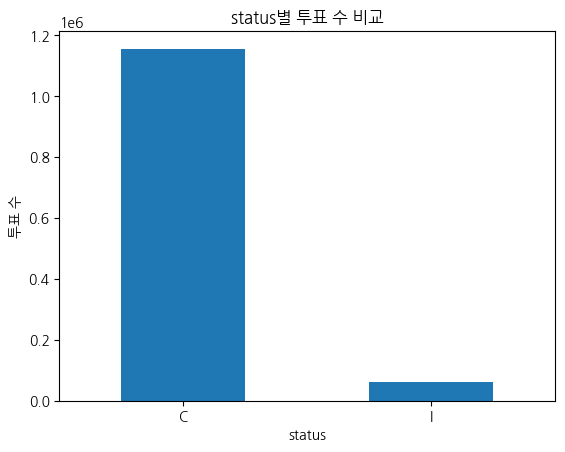

In [13]:
# status별 투표 수 집계
status_votes = userquestionrecord_df[userquestionrecord_df['status'].isin(['C', 'I'])]['status'].value_counts()
print(status_votes)

# 시각화
status_votes.plot(kind='bar', title='status별 투표 수 비교', xlabel='status', ylabel='투표 수', rot=0)
plt.show()

#### answer_status == A(공개) vs P(비공개)) 질문에 대한 투표 수 차이

answer_status
A    111761
P      7865
Name: count, dtype: int64


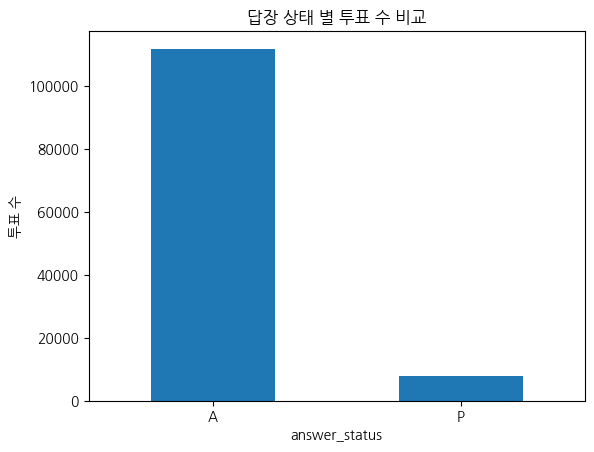

In [14]:
# answer_status 필터링 후 투표 수 집계
answer_status_votes = userquestionrecord_df[userquestionrecord_df['answer_status'].isin(['A', 'P'])]['answer_status'].value_counts()
print(answer_status_votes)

# 시각화
answer_status_votes.plot(kind='bar', title='답장 상태 별 투표 수 비교', xlabel='answer_status', ylabel='투표 수', rot=0)
plt.show()

#### 피크 시간대(12~14시) vs 비피크 시간대의 평균 질문당 투표 수 비교

time_group
비피크    213.963017
피크     349.489270
Name: vote_count, dtype: float64


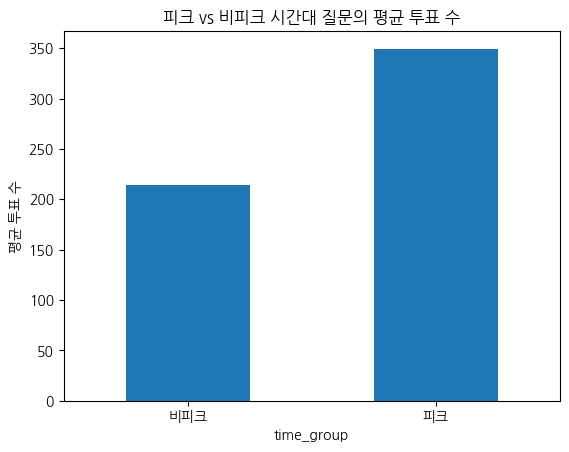

In [15]:
# 질문 생성 시점 기준으로 피크/비피크 분류
# 1. question 테이블에서 질문별 created_at 가져오기
question_created_df = userquestionrecord_df.groupby('question_id')['created_at'].min().reset_index()

# 2. 생성 시간에서 hour 추출
question_created_df['hour'] = question_created_df['created_at'].dt.hour

# 3. 피크/비피크 분류
question_created_df['time_group'] = question_created_df['hour'].apply(
    lambda x: '피크' if 12 <= x <= 14 else '비피크'
)

# 4. 각 question_id의 투표 수 집계
votes_per_question = userquestionrecord_df['question_id'].value_counts().reset_index()
votes_per_question.columns = ['question_id', 'vote_count']

# 5. 병합
merged = pd.merge(question_created_df, votes_per_question, on='question_id')

# 6. 그룹별 평균 투표 수
avg_votes = merged.groupby('time_group')['vote_count'].mean()
print(avg_votes)

# 7. 시각화
avg_votes.plot(kind='bar', title='피크 vs 비피크 시간대 질문의 평균 투표 수', ylabel='평균 투표 수', rot=0)
plt.show()

#### 초성을 여는 질문

In [16]:
initial_questions = userquestionrecord_df[userquestionrecord_df['status'] == 'I']
sample_initial_q_ids = initial_questions['question_id'].unique()[:5]
print(sample_initial_q_ids)

[297 209 257 245 253]


- 297: 공과사를 가장 구분 잘할거 같은 사람은?	
- 209: 항상 좋은 냄새가 나는 사람은?
- 257: 가장 친해지고 싶었던 사람은?
- 245: 매일 보고 싶은 사람은?
- 253: 생각이 가장 깊은 사람은?	

#### 읽지 않고 투표만 한 경우

In [30]:
# 조건: 열람 횟수 0인데 읽음 처리된 경우
anomaly_df = userquestionrecord_df[(userquestionrecord_df["opened_times"] == 0) & (userquestionrecord_df["has_read"] == 1)]

# 건수 확인
print(f"열어보지 않았는데 읽은 것으로 처리된 건수: {len(anomaly_df):,}건")

열어보지 않았는데 읽은 것으로 처리된 건수: 618,901건


In [31]:
total_rows = len(userquestionrecord_df)
anomaly_rate = len(anomaly_df) / total_rows * 100
print(f"전체 중 이런 케이스 비율: {anomaly_rate:.2f}%")

전체 중 이런 케이스 비율: 50.83%


has_read 플래그는 단순히 "질문이 자동으로 화면에 노출된 상태"를 의미할 수 있으며,              
실제 유저가 주도적으로 열람한 경우(opened_times > 0) 와는 구분할 필요가 있다.

In [32]:
# 진짜 읽은 사람 = 읽음 표시가 있으면서 실제로 열어본 기록이 있음
userquestionrecord_df["is_truly_read"] = (userquestionrecord_df["has_read"] == 1) & (userquestionrecord_df["opened_times"] > 0)

In [33]:
# 투표 여부 정의 (기존대로 chosen_user_id 기준)
userquestionrecord_df["is_voted"] = userquestionrecord_df["chosen_user_id"].notnull()

# 무성의 투표 = 읽지 않았고 투표만 함
userquestionrecord_df["is_careless_vote_v2"] = (~userquestionrecord_df["is_truly_read"]) & (userquestionrecord_df["is_voted"])


In [34]:
careless_votes_v2 = userquestionrecord_df["is_careless_vote_v2"].sum()
total_votes = userquestionrecord_df["is_voted"].sum()
careless_rate_v2 = careless_votes_v2 / total_votes * 100

print(f"진짜 안 읽고 투표한 건수: {careless_votes_v2:,}건")
print(f"진짜 안 읽고 투표한 비율: {careless_rate_v2:.2f}%")


진짜 안 읽고 투표한 건수: 1,160,528건
진짜 안 읽고 투표한 비율: 95.32%


In [35]:
careless_user_df_v2 = userquestionrecord_df.groupby("user_id")["is_careless_vote_v2"].max().reset_index()
careless_user_rate_v2 = careless_user_df_v2["is_careless_vote_v2"].mean() * 100

print(f"진짜 무성의 투표한 적 있는 유저 비율: {careless_user_rate_v2:.2f}%")


진짜 무성의 투표한 적 있는 유저 비율: 99.96%


서비스 구조상 질문이 자동 노출되거나, 사용자 컨텍스트 없이도 쉽게 투표할 수 있도록 설계되어 있음을 의미

#### 실제로 읽고 투표함

In [36]:
# is_truly_read와 is_voted가 모두 True
userquestionrecord_df["is_truly_read_vote"] = (
    (userquestionrecord_df["has_read"] == 1) &
    (userquestionrecord_df["opened_times"] > 0) &
    (userquestionrecord_df["chosen_user_id"].notnull())
)


In [37]:
truly_read_votes = userquestionrecord_df["is_truly_read_vote"].sum()
total_votes = userquestionrecord_df["chosen_user_id"].notnull().sum()
truly_read_vote_rate = truly_read_votes / total_votes * 100

print(f"실제 읽고 투표한 건수: {truly_read_votes:,}건")
print(f"실제 읽고 투표한 비율: {truly_read_vote_rate:.2f}%")


실제 읽고 투표한 건수: 57,030건
실제 읽고 투표한 비율: 4.68%


In [39]:
# 투표 안 한 기록이 있는지 확인
userquestionrecord_df["chosen_user_id"].isnull().sum()

0